In [106]:
import numpy as np
import pandas as pd
import time
import datetime
from matplotlib import pyplot as plt
import re
import importlib

import data_preprocessing as prep

importlib.reload(prep)

<module 'data_preprocessing' from 'c:\\Users\\Uzivatel\\Documents\\Py\\AIMatch\\data_preprocessing.py'>

#### Ideas

- Do not include matches with no team from test set.  - OK
- Clean teams columns (e.g. strip)   - OK
- Classify tournaments into groups   - OK 
- Include home team advantage - OK
- Skip city and country              - OK

In [107]:
path_matches = "Data/AI Match Results 150years_appended_WC2022.txt"

In [108]:
data_raw = pd.read_csv(path_matches)
display(data_raw.tail(5))


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
44119,10.12.2022,Winners Match 51,Winners Match 52,NaN,NaN,FIFA World Cup 2022,Al Bayt,Qatar,NaN
44120,13.12.2022,Winners Match 57,Winners Match 58,NaN,NaN,FIFA World Cup 2022,Lusail Iconic,Qatar,NaN
44121,14.12.2022,Winners Match 59,Winners Match 60,NaN,NaN,FIFA World Cup 2022,Al Bayt,Qatar,NaN
44122,17.12.2022,Losers Match 61,Losers Match 62,NaN,NaN,FIFA World Cup 2022,Khalifa International,Qatar,NaN
44123,18.12.2022,Winners Match 61,Winners Match 62,NaN,NaN,FIFA World Cup 2022,Lusail Iconic,Qatar,NaN


In [110]:
display(prep.preprocess_data(data_raw, 
        drop_columns=["city", "country", "tournament", "neutral", "date"], 
        strip_columns=["home_team", "away_team", "tournament"]))

,home_team,away_team,home_score,away_score,tournament_group,home_advantage
0,Scotland,England,0.0,0.0,Friendly,1
1,England,Scotland,4.0,2.0,Friendly,1
2,Scotland,England,2.0,1.0,Friendly,1
3,England,Scotland,2.0,2.0,Friendly,1
4,Scotland,England,3.0,0.0,Friendly,1
...,...,...,...,...,...,...
44119,Winners Match 51,Winners Match 52,NaN,NaN,World Cup,0
44120,Winners Match 57,Winners Match 58,NaN,NaN,World Cup,0
44121,Winners Match 59,Winners Match 60,NaN,NaN,World Cup,0
44122,Losers Match 61,Losers Match 62,NaN,NaN,World Cup,0


## Data cleaning

In [42]:
def strip_name(s: str):
    return s.strip()

data_raw.home_team = data_raw.home_team.apply(strip_name)
data_raw.away_team = data_raw.away_team.apply(strip_name)

data_raw = data_raw.drop(["city", "country"], axis=1)

display(data_raw.head())



,date,home_team,away_team,home_score,away_score,tournament,neutral
0,1872-11-30,Scotland,Scotland,0.0,0.0,Friendly,False
1,1873-03-08,England,England,4.0,2.0,Friendly,False
2,1874-03-07,Scotland,Scotland,2.0,1.0,Friendly,False
3,1875-03-06,England,England,2.0,2.0,Friendly,False
4,1876-03-04,Scotland,Scotland,3.0,0.0,Friendly,False


## Plot distribution

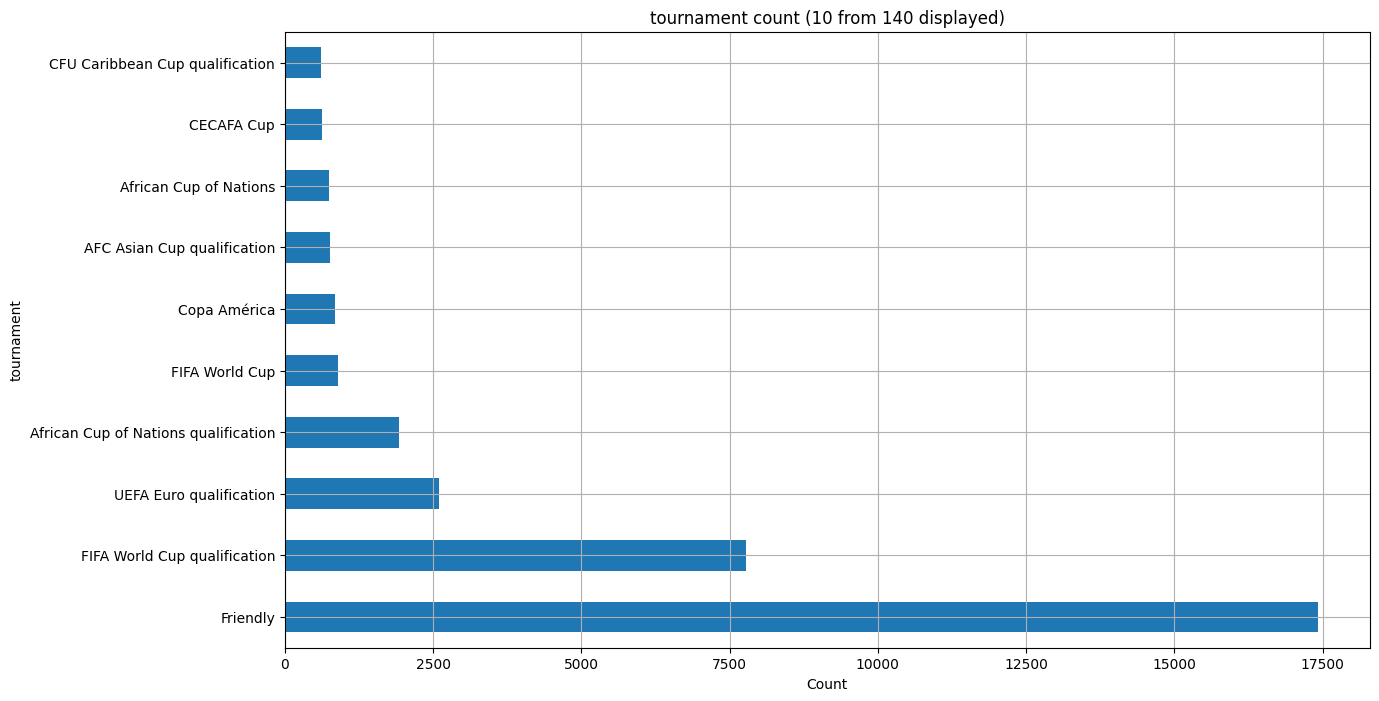

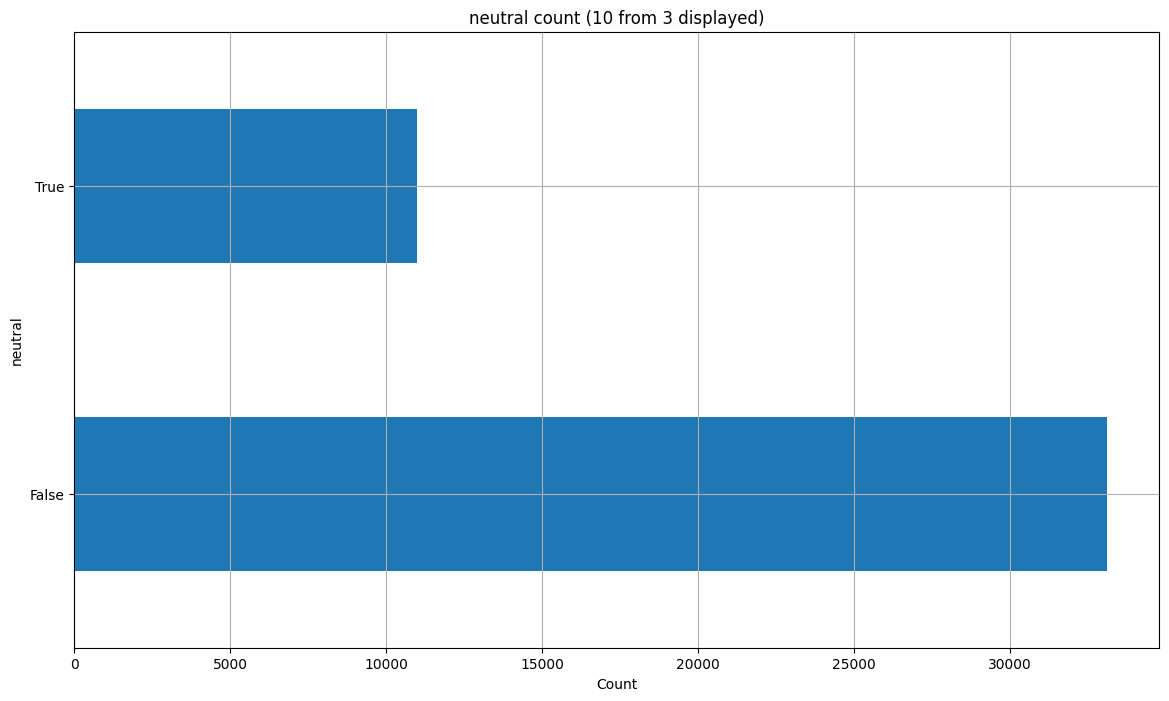

In [89]:
def plot_distribution(df: pd.DataFrame, column: str, n=10):
    plt.figure()

    ax = df[column].value_counts()[:n].plot(kind='barh',
                                                figsize=(14,8),
                                                title=column + " count (%s from %s displayed)" % (n, len(data_raw[column].unique())))
    ax.set_ylabel(column)
    ax.set_xlabel("Count")
    ax.grid()
    plt.show()

plot_distribution(data_raw, "tournament")
plot_distribution(data_raw, "neutral")

In [87]:
for t in sorted(data_raw.tournament.unique().tolist()):
    print(t, " ---   ", tournament_group(t))

#print([t for t in data_raw.tournament.unique() if "africa" in t.lower()])

ABCS Tournament  ---    Others
AFC Asian Cup  ---    Continental Cup
AFC Asian Cup qualification  ---    Continental Cup Qualification
AFC Challenge Cup  ---    Others
AFC Challenge Cup qualification  ---    Others
AFF Championship  ---    Others
AFF Championship qualification  ---    Others
African Cup of Nations  ---    Continental Cup
African Cup of Nations qualification  ---    Continental Cup Qualification
African Nations Championship  ---    Others
African Nations Championship qualification  ---    Others
Afro-Asian Games  ---    Others
Amílcar Cabral Cup  ---    Others
Arab Cup  ---    Others
Arab Cup qualification  ---    Others
Atlantic Cup  ---    Others
Atlantic Heritage Cup  ---    Others
Balkan Cup  ---    Others
Baltic Cup  ---    Others
Beijing International Friendship Tournament  ---    Others
Bolivarian Games  ---    Others
Brazil Independence Cup  ---    Others
British Championship  ---    Others
CCCF Championship  ---    Others
CECAFA Cup  ---    Others
CFU Caribbean

C:\Users\Uzivatel\AppData\Local\Temp\ipykernel_10388\547719431.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(data_raw[data_raw.tournament_group!="Friendly"][data_raw.tournament_group!="Others"])


,date,home_team,away_team,home_score,away_score,tournament,neutral,tournament_group
438,02.07.1916,Chile,Chile,0.0,4.0,Copa América,True,Continental Cup
440,06.07.1916,Argentina,Argentina,6.0,1.0,Copa América,False,Continental Cup
441,08.07.1916,Brazil,Brazil,1.0,1.0,Copa América,True,Continental Cup
442,10.07.1916,Argentina,Argentina,1.0,1.0,Copa América,False,Continental Cup
444,12.07.1916,Brazil,Brazil,1.0,2.0,Copa América,True,Continental Cup
...,...,...,...,...,...,...,...,...
43405,30.01.2022,Senegal,Senegal,3.0,1.0,African Cup of Nations,True,Continental Cup
43426,02.02.2022,Burkina Faso,Burkina Faso,1.0,3.0,African Cup of Nations,True,Continental Cup
43431,03.02.2022,Cameroon,Cameroon,0.0,0.0,African Cup of Nations,False,Continental Cup
43432,05.02.2022,Cameroon,Cameroon,3.0,3.0,African Cup of Nations,False,Continental Cup


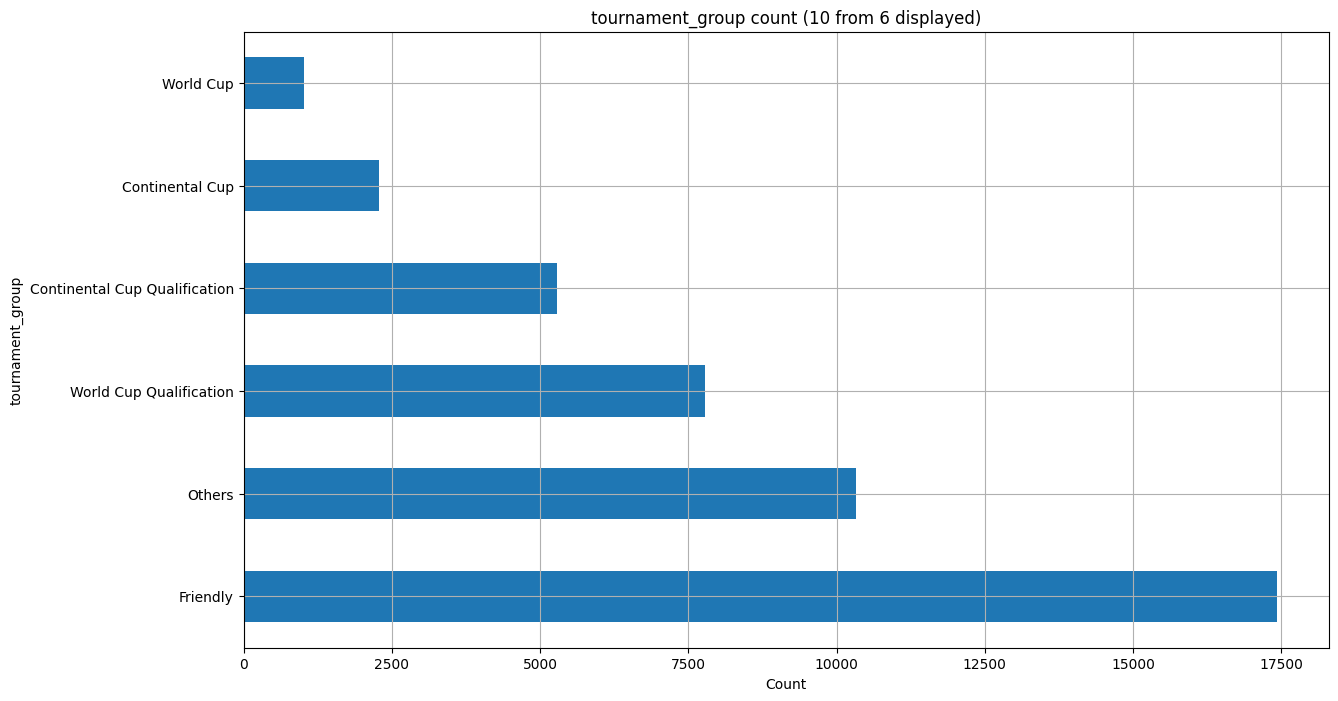

In [90]:
def tournament_group(tournament: str):
    t = tournament.lower().replace(" ","")

    if t == "friendly":
        return "Friendly"

    if t.endswith("worldcup") or t.endswith("worldcup2022"):
        return "World Cup"
    
    if t.endswith("euro") or t.endswith("copaamérica") or t.endswith("africancupofnations") or t.endswith("asiancup"):
        return "Continental Cup"

    if t.endswith("worldcupqualification") or t.endswith("worldcup2022qualification"):
        return "World Cup Qualification"
    
    if t.endswith("euroqualification") or t.endswith("copaaméricaqualification") or t.endswith("africancupofnationsqualification") or t.endswith("asiancupqualification"):
        return "Continental Cup Qualification"
    
    return "Others"

data_raw["tournament_group"] = data_raw.tournament.apply(tournament_group)
display(data_raw[data_raw.tournament_group!="Friendly"][data_raw.tournament_group!="Others"])

plot_distribution(data_raw, "tournament_group")

## Get unique values

In [28]:
teams = set(data_raw.home_team.unique().tolist() + data_raw.away_team.unique().tolist())
for i, team in enumerate(teams):
    print(i, team)

0 France
1 Chameria
2 Barbados
3 Myanmar
4 Winners Group F
5 Kenya
6 Nicaragua
7 Falkland Islands
8 Belgium
9 Jamaica
10 Italy
11 Eritrea
12 Jordan
13 Tanzania
14 North Macedonia
15 Nepal
16 Western Australia
17 Tajikistan
18 Réunion
19 Northern Ireland
20 Israel
21 Yemen
22 Norway
23 Belarus
24 South Africa
25 Iraq
26 Congo
27 United Arab Emirates
28 Turkey
29 Orkney
30 Morocco
31 Greece
32 Winners Match 55
33 Ghana
34 Cambodia
35 Provence
36 Kosovo
37 Saudi Arabia
38 India
39 Galicia
40 Ivory Coast
41 Turks and Caicos Islands
42 Losers Match 61
43 Puerto Rico
44 Qatar
45 Zanzibar
46 São Tomé and Príncipe
47 Czech Republic
48 Brunei
49 Equatorial Guinea
50 Slovenia
51 Brazil
52 Kiribati
53 Cuba
54 Ynys Môn
55 Madrid
56 Winners Group E
57 Padania
58 Syria
59 Rhodes
60 Egypt
61 New Zealand
62 Togo
63 Arameans Suryoye
64 Vatican City
65 Mapuche
66 Romani people
67 Guadeloupe
68 American Samoa
69 Kyrgyzstan
70 Western Isles
71 Madagascar
72 Trinidad and Tobago
73 Zimbabwe
74 Saint Vincent

In [32]:
for col in data_raw.columns:
    if not "team" in col:
        print(col, ":", data_raw[col].unique())

date : ['1872-11-30' '1873-03-08' '1874-03-07' ... '14.12.2022' '17.12.2022'
 '18.12.2022']
home_score : [ 0.  4.  2.  3.  1.  7.  9.  5.  6.  8. 11. 13. 12. 10. 15. 14. 21. 30.
 24. 18. 16. 19. 20. 17. 22. 31. nan]
away_score : [ 0.  2.  1.  3.  4.  6.  5. 13.  8.  7. 10.  9. 11. 12. 15. 18. 16. 14.
 19. 20. 17. 21. nan]
tournament : ['Friendly' 'British Championship' 'Copa Lipton' 'Copa Newton'
 'Copa Premio Honor Argentino' 'Copa Premio Honor Uruguayo' 'Copa Roca'
 'Copa América' 'Copa Chevallier Boutell' 'Nordic Championship'
 'International Cup' 'Baltic Cup' 'Balkan Cup' 'FIFA World Cup'
 'Copa Rio Branco' 'FIFA World Cup qualification' 'Bolivarian Games'
 'CCCF Championship' 'NAFU Championship' 'Copa Oswaldo Cruz'
 'Pan American Championship' 'Copa del Pacífico' "Copa Bernardo O'Higgins"
 'AFC Asian Cup qualification' 'Atlantic Cup' 'AFC Asian Cup'
 'African Cup of Nations' 'Copa Paz del Chaco' 'Merdeka Tournament'
 'UEFA Euro qualification' 'UEFA Euro' 'Windward Islands Tourname

### Split Dataset

In [33]:
data_raw_new = data_raw[data_raw.home_score.isnull()]
display(data_raw_new)

data_raw_played = data_raw[data_raw.home_score.notnull()]
display(data_raw_played)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
44060,20.11.2022,Qatar,Qatar,NaN,NaN,FIFA World Cup 2022,Al Bayt,Qatar,False
44061,21.11.2022,England,England,NaN,NaN,FIFA World Cup 2022,Khalifa International,Qatar,True
44062,21.11.2022,Senegal,Senegal,NaN,NaN,FIFA World Cup 2022,Al Thumama,Qatar,True
44063,21.11.2022,United States,United States,NaN,NaN,FIFA World Cup 2022,Ahmad bin Ali,Qatar,True
44064,22.11.2022,Argentina,Argentina,NaN,NaN,FIFA World Cup 2022,Lusail Iconic,Qatar,True
...,...,...,...,...,...,...,...,...,...
44119,10.12.2022,Winners Match 51,Winners Match 51,NaN,NaN,FIFA World Cup 2022,Al Bayt,Qatar,NaN
44120,13.12.2022,Winners Match 57,Winners Match 57,NaN,NaN,FIFA World Cup 2022,Lusail Iconic,Qatar,NaN
44121,14.12.2022,Winners Match 59,Winners Match 59,NaN,NaN,FIFA World Cup 2022,Al Bayt,Qatar,NaN
44122,17.12.2022,Losers Match 61,Losers Match 61,NaN,NaN,FIFA World Cup 2022,Khalifa International,Qatar,NaN


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,Scotland,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,England,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,Scotland,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,England,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,Scotland,3.0,0.0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
44055,27.09.2022,Norway,Norway,0.0,2.0,UEFA Nations League,Oslo,Norway,False
44056,27.09.2022,Sweden,Sweden,1.0,1.0,UEFA Nations League,Stockholm,Sweden,False
44057,27.09.2022,Kosovo,Kosovo,5.0,1.0,UEFA Nations League,Pristina,Kosovo,False
44058,27.09.2022,Greece,Greece,3.0,1.0,UEFA Nations League,Athens,Greece,False


In [35]:
teams_test = set([team for team in data_raw_new.home_team.unique() if not ("group" in team.lower() or "match" in team.lower())])
print(teams_test, len(teams_test))

{'Iran', 'Wales', 'Ecuador', 'France', 'Uruguay', 'Saudi Arabia', 'Germany', 'Argentina', 'Spain', 'Poland', 'Portugal', 'Canada', 'Mexico', 'Qatar', 'England', 'Belgium', 'Switzerland', 'South Korea', 'Costa Rica', 'Senegal', 'Morocco', 'Japan', 'Croatia', 'Serbia', 'Brazil', 'Ghana', 'Netherlands', 'Tunisia', 'United States', 'Denmark', 'Cameroon', 'Australia'} 32


In [10]:
def is_test_team(match, teams):
    return match["home_team"] in teams or match["away_team"] in teams

In [11]:
data_raw_played_testonly = data_raw_played[data_raw_played.apply(lambda x: is_test_team(x, teams_test), axis=1)]
display(data_raw_played_testonly)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
44045,27.09.2022,Qatar,Chile,2.0,2.0,Friendly,Vienna,Austria,True
44046,27.09.2022,Saudi Arabia,United States,0.0,0.0,Friendly,Murcia,Spain,True
44050,27.09.2022,Portugal,Spain,0.0,1.0,UEFA Nations League,Braga,Portugal,False
44051,27.09.2022,Switzerland,Czech Republic,2.0,1.0,UEFA Nations League,St. Gallen,Switzerland,False
